# Análisis de los resultados

Ejemplo de simulación de un puerto. En este archivo analizaremos los datos y las conclusiones que podemos sacar de las diferentes funciones.


In [32]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df = pd.read_csv('./csv/medioTE.csv')

# Tipos de barcos llegados al puerto

Este gráfico de barras compara la cantidad de barcos de diferentes tipos. En el eje x, muestra los tipos de barcos, mientras que en el eje y muestra la cantidad de barcos. Además, imprime la distribución de tipos de barcos en forma de conteo. En conclusión, podemos ver la cantidad de tipos de barcos que ingresan al puerto. Esta cantidad puede variar dependiendo del tipo de puerto en el que nos encontremos, ya que cambiarán los muelles disponibles para cada tipo de barco.

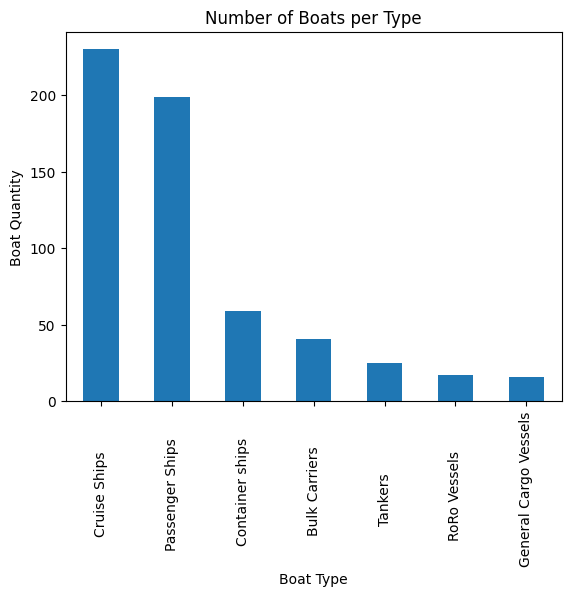

Distribution of Boat Types:
Type
Cruise Ships             230
Passenger Ships          199
Container ships           59
Bulk Carriers             41
Tankers                   25
RoRo Vessels              17
General Cargo Vessels     16
Name: count, dtype: int64


In [34]:
# Bar chart to compare the quantity of vehicles of different types
df['Type'].value_counts().plot(kind='bar')
plt.title('Number of Boats per Type')
plt.xlabel('Boat Type')
plt.ylabel('Boat Quantity')
plt.show()

# Distribution of boat types
boat_type_distribution = df['Type'].value_counts()

# Show the distribution of boat types
print("Distribution of Boat Types:")
print(boat_type_distribution)


En este gráfico, podemos ver la distribución de los tipos de barco de manera más clara y eficiente.

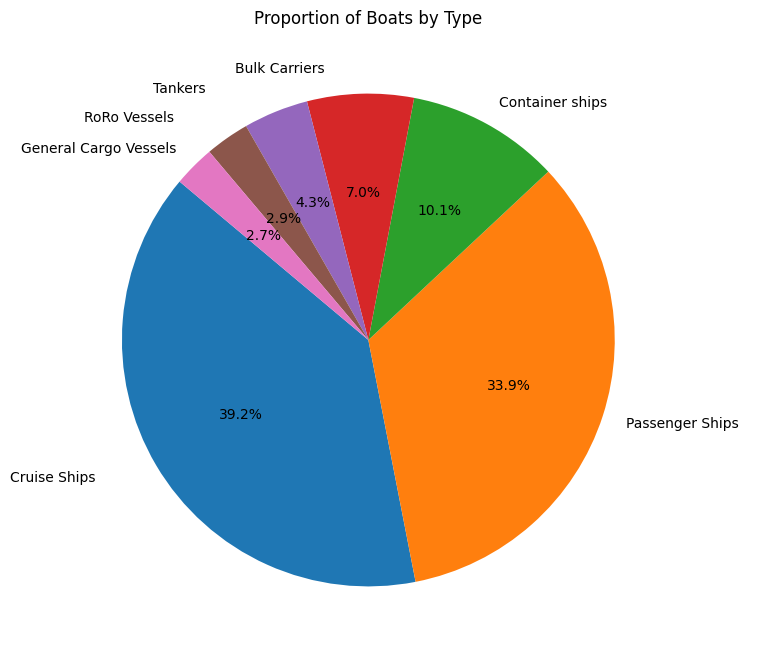

In [35]:
# Pie chart of boat count by type
type_counts = df['Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Boats by Type')
plt.show()


# Análisis de cada tipo de puerto


Esta función calcula el tiempo promedio de espera de los barcos en cada tipo de puerto, así como la suma total de los precios de los servicios portuarios en cada puerto. Luego, imprime un resumen que muestra esta información para cada tipo de puerto.

Con esta información, podemos entender cuánto tiempo pasan los barcos esperando en promedio en cada tipo de puerto, lo cual puede ser útil para identificar áreas donde se pueden mejorar los procesos de servicio portuario. Además, podemos observar la cantidad total de ingresos generados por los servicios portuarios en cada puerto, lo que puede proporcionar información sobre la actividad económica asociada a cada puerto en específico para conocer y mejorar la actividad económica del puerto.

In [36]:
df['Waiting Time'] = df['Start Unloading Time'] - df['Arrival Time']

port_type_summary = df.groupby('Port').agg({'Waiting Time': 'mean', 'Total Price': 'sum'})
print("Summary by Port Type:")
print(port_type_summary)

total_price_sum = port_type_summary['Total Price'].sum()
print("Total sum of prices:", total_price_sum)

Summary by Port Type:
          Waiting Time   Total Price
Port                                
CGRRport      6.260242  1.956893e+06
CTPport       0.693678  1.627627e+07
PCport        0.479672  5.160766e+06
TGport        4.249382  6.937124e+06
Total sum of prices: 30331053.347959932


Esta función te hace un resumen estadístico de todas las variables del archivo csv

In [37]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
            Boat  Extra Crew  Arrival Time  Start Unloading Time  \
count  587.00000  587.000000    587.000000            587.000000   
mean   294.00000   10.352641   4344.643952           4346.028852   
std    169.59658    6.168842   2525.077650           2525.806732   
min      1.00000    0.000000      0.000000              0.000000   
25%    147.50000    5.000000   2143.500000           2143.500000   
50%    294.00000   11.000000   4341.000000           4341.000000   
75%    440.50000   16.000000   6528.000000           6528.000000   
max    587.00000   20.000000   8700.000000           8700.000000   

       End Unloading Time  Start Loading Time  End Loading Time  \
count          587.000000          587.000000        587.000000   
mean          4367.068541         4367.068541       4387.023051   
std           2527.248278         2527.248278       2528.523699   
min             22.225727           22.225727         33.271541   
25%           2170.612870   

# Analisis del tiempo de espera en función del tiempo de llegada 

Esta función crea un gráfico de dispersión que muestra la relación entre el tiempo de espera y la hora de llegada de los barcos al puerto. En el eje x se representa el tiempo de llegada de los barcos, mientras que en el eje y se representa el tiempo de espera de los barcos antes de comenzar la descarga.

El gráfico permite visualizar si hay alguna tendencia o patrón en cómo varía el tiempo de espera en función del momento en que llegan los barcos al puerto. Por ejemplo, si los puntos se agrupan en ciertas áreas del gráfico, podría indicar períodos de mayor congestión en los que los barcos tienen que esperar más tiempo antes de comenzar las operaciones de descarga. Esta información puede ser útil para identificar momentos específicos en los que se requieren ajustes en la planificación o la asignación de recursos para optimizar la eficiencia operativa del puerto.

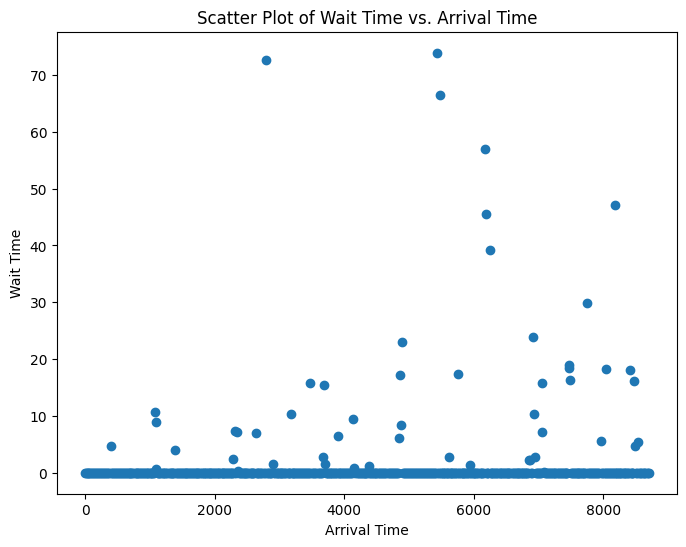

Number of boats that experienced a wait time: 52


In [38]:
df['Wait Time'] = df['Start Unloading Time'] - df['Arrival Time']

plt.figure(figsize=(8, 6))
plt.scatter(df['Arrival Time'], df['Wait Time'])
plt.title("Scatter Plot of Wait Time vs. Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Wait Time")
plt.show()

wait_time_count = (df['Wait Time'] != 0).sum()
print("Number of boats that experienced a wait time:", wait_time_count)

Esta función te calcula el tiempo promedio de espera del puerto. Nuestro objetivo será intetar reducir al maximo el tiempo para crear el puerto más eficiente posible.

In [39]:
df['Wait Time'] = df['Start Unloading Time'] - df['Arrival Time']
average_wait_time = df['Wait Time'].mean().round(2)
print(f'Average wait time: {average_wait_time}')

Average wait time: 1.38


# Tipos de errores

Esta función realiza un análisis agrupando los datos por el tipo de barco. Calcula la suma total de errores y retrasos para cada tipo de barco en el conjunto de datos. Luego, muestra la cantidad de errores y retrasos por tipo de barco en la salida. Proporciona información sobre la incidencia de errores y retrasos específicos para cada categoría de barco en el puerto.



Este análisis es útil para identificar patrones o tendencias en la ocurrencia de errores y retrasos, lo que puede ayudar a tomar decisiones informadas para mejorar la eficiencia y la gestión operativa del puerto. Aumentando por ejemplo el personal disponible que pueda solucionar los errores más concurrentes para disminuir el tiempo de un muelle sin utilizar, aumenttando asi la efectividad 

In [40]:
errors_by_boat_type = df.groupby('Type')['Error'].sum()
delays_by_boat_type = df.groupby('Type')['Error Delay'].sum()

# Display the number of errors and delays by boat type
print("\nErrors by boat type:")
print(errors_by_boat_type)
print("\nDelays by boat type:")
print(delays_by_boat_type)


Errors by boat type:
Type
Bulk Carriers                     Motor Breakdown Motor Breakdown Customs 
Container ships                                            Strike Customs 
Cruise Ships             Customs Motor Breakdown Motor Breakdown Custom...
General Cargo Vessels                                             Customs 
Passenger Ships          Customs Customs Motor Breakdown Strike Motor B...
RoRo Vessels                                                             0
Tankers                                                                  0
Name: Error, dtype: object

Delays by boat type:
Type
Bulk Carriers             85
Container ships           71
Cruise Ships             143
General Cargo Vessels     19
Passenger Ships          319
RoRo Vessels               0
Tankers                    0
Name: Error Delay, dtype: int64


PONER QUE TARDA MAS EL DE DESCRAGA POR LO DE ADUNAS MOTOR...


# Comparación del tiempo de carga con el tiempo de descarga 

Esta función realiza un análisis de los tiempos de operación por tipo de barco en el puerto. Calcula la duración promedio de carga y descarga para cada tipo de barco en el conjunto de datos. Este análisis proporciona una visión general de cómo varían los tiempos de operación según el tipo de barco, lo que puede ser útil para identificar áreas de mejora en la eficiencia operativa del puerto.

El comportamiento más normal que analizaremos será que el tiempo de descraga sea mayor que el de carga, ya que en el tiempo de descarga hay otros imprevistos como aduanas, motor roto...

Average Loading Duration: 19.954510480832173
Average Unloading Duration: 21.039689356471026
Average Port Duration: 40.9941998373032


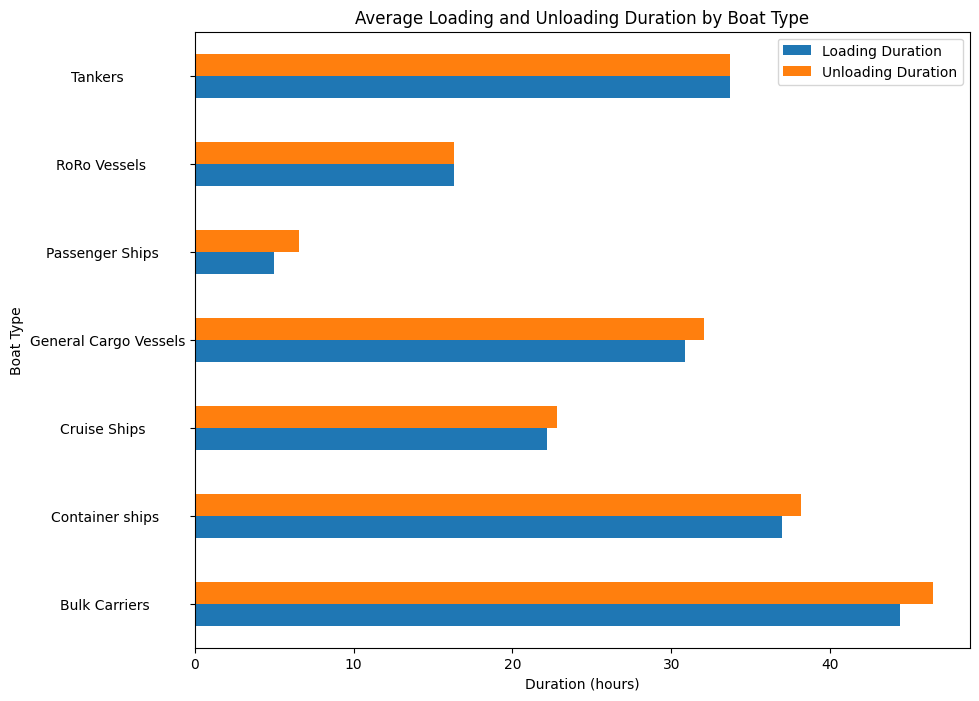

In [41]:
# Analysis of operation times by boat type
df['Loading Duration'] = df['End Loading Time'] - df['Start Loading Time']
df['Unloading Duration'] = df['End Unloading Time'] - df['Start Unloading Time']

average_loading_duration = df['Loading Duration'].mean()
average_unloading_duration = df['Unloading Duration'].mean()
port_time = average_loading_duration + average_unloading_duration

print(f'Average Loading Duration: {average_loading_duration}')
print(f'Average Unloading Duration: {average_unloading_duration}')
print(f'Average Port Duration: {port_time}')
# Average loading and unloading times by boat type
operation_times_by_type = df.groupby('Type')[['Loading Duration', 'Unloading Duration']].mean()

# Visualization
operation_times_by_type.plot(kind='barh', figsize=(10, 8))
plt.title('Average Loading and Unloading Duration by Boat Type')
plt.xlabel('Duration (hours)')
plt.ylabel('Boat Type')
plt.show()


Esta función genera un gráfico de caja (boxplot) para comparar los tiempos de descarga de diferentes tipos de barcos en el puerto. El gráfico está segmentado por tipo de barco, lo que permite visualizar la variabilidad en los tiempos de descarga dentro de cada categoría.

Este gráfico es útil para comprender la dispersión y la distribución de los tiempos de descarga entre diferentes tipos de barcos, lo que puede ayudar a identificar patrones y posibles áreas de mejora en la eficiencia de la operación portuaria. Identenficando datos atípicos y sobre todo si suelen ser recurrentes en un mismo tipo podemos analizar posibles mejoras para que estos no se den.

<Figure size 1200x800 with 0 Axes>

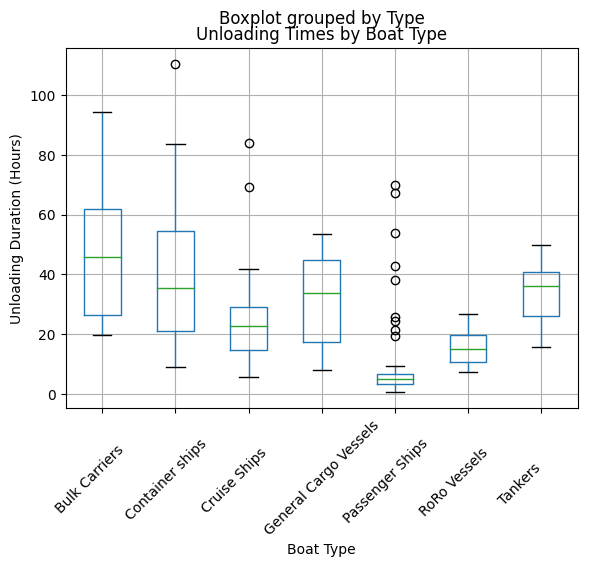

In [42]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Unloading Duration', by='Type', grid=True)
plt.title('Unloading Times by Boat Type')
plt.xlabel('Boat Type')
plt.ylabel('Unloading Duration (Hours)')
plt.xticks(rotation=45)
plt.show()